In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
import os
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [3]:
data = pd.read_csv(os.getenv('PUIDATA') + '/' + 'Zip_MedianRentalPrice_Studio.csv')
data.head()

,RegionName,City,State,Metro,CountyName,SizeRank,2010-03,2010-04,2010-05,2010-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,10025,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,...,2500.0,2618.0,2600.0,2600.0,2695.0,2625.0,2650.0,2700.0,2659.5,2450.0
1,60657,Chicago,IL,"Chicago, IL",Cook,2,NaN,NaN,NaN,NaN,...,1095.0,1080.0,1150.0,1150.0,1140.0,1125.0,1140.0,1140.0,1120.0,1090.0
2,10023,New York,NY,"New York, NY",New York,3,NaN,NaN,NaN,NaN,...,2800.0,2800.0,2893.0,2900.0,2800.0,2800.0,2850.0,2800.0,2770.0,2695.0
3,60614,Chicago,IL,"Chicago, IL",Cook,4,NaN,NaN,NaN,NaN,...,1461.0,1450.0,1445.0,1395.0,1350.0,1335.0,1295.0,1295.0,1250.0,1250.0
4,79936,El Paso,TX,"El Paso, TX",El Paso,5,NaN,NaN,NaN,NaN,...,985.0,995.0,995.0,995.0,1050.0,1025.0,1050.0,1047.5,1000.0,1050.0


In [5]:
data1 = data[(data.RegionName > 10000) & (data.RegionName < 11500)]
data1 = data1[(data1.City == 'New York')]
columns = data1.columns[1:64]
data1.drop(columns, axis=1, inplace=True)
data1 = data1[(data1.RegionName > 10003) & (data1.RegionName < 10007)]
data1.dropna(inplace=True)
data1 = pd.DataFrame(data1.sum(axis=0))
data1['Date'] = data1.index

In [6]:
data1.head()

,0,Date
RegionName,20011.0,RegionName
2015-01,5956.0,2015-01
2015-02,5995.0,2015-02
2015-03,5963.0,2015-03
2015-04,6043.5,2015-04


In [7]:
data1.reset_index(inplace=True, drop=True)
data1['Financial District Rent'] = data1[0]
data1.head()

,0,Date,Financial District Rent
0,20011.0,RegionName,20011.0
1,5956.0,2015-01,5956.0
2,5995.0,2015-02,5995.0
3,5963.0,2015-03,5963.0
4,6043.5,2015-04,6043.5


In [10]:
data1 = data1.drop(0, axis=1)

In [11]:
data1.head()

,Date,Financial District Rent
0,RegionName,20011.0
1,2015-01,5956.0
2,2015-02,5995.0
3,2015-03,5963.0
4,2015-04,6043.5


In [12]:
data1 = data1[1:]
data1.head()

,Date,Financial District Rent
1,2015-01,5956.0
2,2015-02,5995.0
3,2015-03,5963.0
4,2015-04,6043.5
5,2015-05,6175.0


In [13]:
data1['Financial District Rent'] = data1['Financial District Rent']/2

In [14]:
dataX = data[(data.RegionName == 11209)]
dataY = data[(data.RegionName == 11214)]
dataZ = data[(data.RegionName == 11228)]
dataX = dataX.append(dataY)
dataX = dataX.append(dataZ)

In [15]:
columns = dataX.columns[1:64]
dataX.drop(columns, axis=1, inplace=True)
dataX

,RegionName,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
29,11209,1350.0,1375.0,1380.0,1400.0,1400.0,1475.0,1500.0,1500.0,1695.0,...,1500.0,1450.0,1650.0,1605.0,1575.0,1497.5,1672.5,1695.0,1750.0,1725.0
36,11214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1750.0,1750.0,1750.0,1787.5,1875.0,1900.0,2000.0,2000.0,1950.0,1800.0


In [16]:
data2 = dataX

In [17]:
data2.dropna(inplace=True)
data2 = pd.DataFrame(data2.sum(axis=0))
data2.head()

,0
RegionName,11209.0
2015-01,1350.0
2015-02,1375.0
2015-03,1380.0
2015-04,1400.0


In [18]:
data2['Date'] = data2.index
data2.reset_index(inplace=True, drop=True)
data2['Southwest Brooklyn Rent'] = data2[0]
data2 = data2.drop(0, axis=1)
data2 = data2[1:]
data2.head()

,Date,Southwest Brooklyn Rent
1,2015-01,1350.0
2,2015-02,1375.0
3,2015-03,1380.0
4,2015-04,1400.0
5,2015-05,1400.0


In [19]:
dataAll = pd.merge(data1, data2, on='Date')
dataAll.head()

,Date,Financial District Rent,Southwest Brooklyn Rent
0,2015-01,2978.00,1350.0
1,2015-02,2997.50,1375.0
2,2015-03,2981.50,1380.0
3,2015-04,3021.75,1400.0
4,2015-05,3087.50,1400.0


In [20]:
x = pd.to_datetime(data2['Date'].values)
data2['year'] = x.year
data2.head()

,Date,Southwest Brooklyn Rent,year
1,2015-01,1350.0,2015
2,2015-02,1375.0,2015
3,2015-03,1380.0,2015
4,2015-04,1400.0,2015
5,2015-05,1400.0,2015


In [21]:
start = datetime.datetime(2015,1,1)
dates = [start + relativedelta(months=x) for x in range(0, 44)]

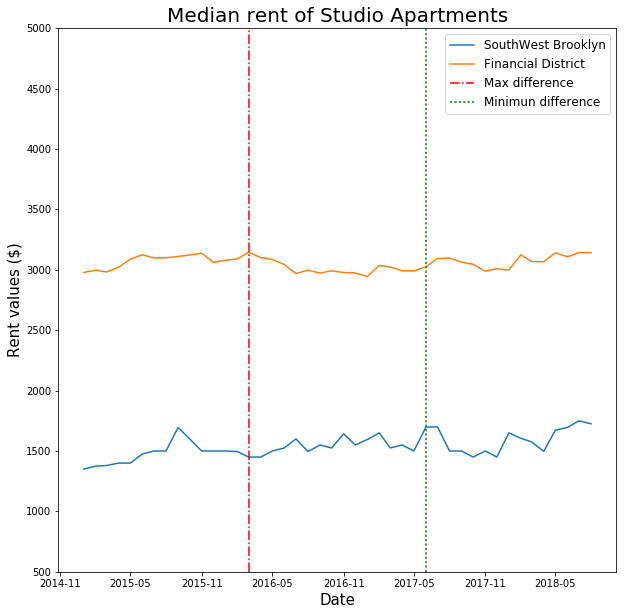

In [22]:
plt.figure(figsize=(10,10))
plt.plot(dates, data2['Southwest Brooklyn Rent'], label='SouthWest Brooklyn')
plt.plot(dates, data1['Financial District Rent'], label='Financial District')
plt.ylabel('Rent values ($)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.title('Median rent of Studio Apartments', fontsize=20)
#plt.xticks(data2['year'])
plt.legend(fontsize=12)
plt.axvline(dates[14], color='red', ls='dashdot', label='Max difference') #ymin=data2['Southwest Brooklyn Rent'].values[14], ymax=data1['Financial District Rent'].values[14])
plt.axvline(dates[29], color='green' , ls='dotted', label='Minimun difference')
plt.ylim(500,5000)
plt.legend(fontsize=12)

In [23]:
print (dataAll['Financial District Rent'] - dataAll['Southwest Brooklyn Rent']).idxmax()
print (dataAll['Financial District Rent'] - dataAll['Southwest Brooklyn Rent']).idxmin()

14
29
